In [1]:
from sklearn.model_selection import train_test_split
import mglearn
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X,  y, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(112, 4) (112,) (38, 4) (38,)


In [3]:
model = DecisionTreeClassifier(max_depth=2, min_samples_split=3)
model.fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.9642857142857143 0.8947368421052632


In [4]:
# 최적의 score 변수
best_score = 0

for depth in [2,3,4,5,6]:
    for min_samples in [5,10,30,50,100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples)
        tree.fit(X_train, y_train)
        
        # 테스트 세트로 의사결정트리를 평가
        score = tree.score(X_test, y_test)
        
        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth':depth, 'min_samples_split':min_samples}

            print(best_score)
            print(best_parameters)
            
print("최고 점수 : {:.2f}".format(best_score))
print("최적 매개변수 :", best_parameters)

0.8947368421052632
{'max_depth': 2, 'min_samples_split': 5}
0.9736842105263158
{'max_depth': 3, 'min_samples_split': 5}
최고 점수 : 0.97
최적 매개변수 : {'max_depth': 3, 'min_samples_split': 5}


In [5]:
from sklearn.tree import DecisionTreeClassifier

# 학습(학습+검증), 테스트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    random_state=0)

In [6]:
# 학습+검증(X_trainvalid, y_trainvalid)을 활용하여 
# 학습, 검증(파라미터튜닝)로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, 
                                                      y_trainval,
                                                      random_state=0)

In [7]:
# 최적의 score 변수
best_score = 0

for depth in [2,3,4,5,6]:
    for min_samples in [5,10,30,50,100]:
        # 매개변수의 각 조합에 대해 트리를 훈련
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples)
        tree.fit(X_train, y_train)
        
        # 테스트 세트로 트리를 평가
        score = tree.score(X_valid, y_valid)
        
        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth':depth, 'min_samples_split':min_samples}

            print(best_score)
            print(best_parameters)

# 학습용 세트와 검증 세트를 합쳐 모델을 다시 만든 후,
# 테스트 세트를 사용해 평가합니다.
tree = DecisionTreeClassifier(**best_parameters)
tree.fit(X_trainval, y_trainval)
test_score = tree.score(X_test, y_test)
            
print("검증 세트에서 최고 점수 : {:.2f}".format(best_score))
print("최적 매개변수 : ", best_parameters)
print("최적 매개변수에서 테스트 세트 점수 : {:.2f}".format(test_score))

0.9642857142857143
{'max_depth': 2, 'min_samples_split': 5}
1.0
{'max_depth': 3, 'min_samples_split': 5}
검증 세트에서 최고 점수 : 1.00
최적 매개변수 :  {'max_depth': 3, 'min_samples_split': 5}
최적 매개변수에서 테스트 세트 점수 : 0.97


In [8]:
import numpy as np

for depth in [2,3,4,5,6]:
    for min_samples in [5,10,30,50,100]:
        # 매개변수의 각 조합에 대해 트리를 훈련
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples)
        
        # 교차 검증을 적용합니다. 
        scores =  cross_val_score(tree, X_trainval, y_trainval, cv=5)
        
        # 교차 검증 정확도의 평균을 계산.
        score = np.mean(scores)

        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth':depth, 'min_samples_split':min_samples}

In [9]:
# 학습용 세트와 검증 세트를 합쳐 모델을 다시 만든 후,
# 테스트 세트를 사용해 평가합니다.
tree = DecisionTreeClassifier(**best_parameters)
tree.fit(X_trainval, y_trainval)
test_score = tree.score(X_test, y_test)

print("최적 매개변수 : ", best_parameters)
print("최적 매개변수에서 테스트 세트 점수 : {:.2f}".format(test_score))

최적 매개변수 :  {'max_depth': 3, 'min_samples_split': 5}
최적 매개변수에서 테스트 세트 점수 : 0.97


In [10]:
# 매개변수 
param_grid = {'max_depth':[2,3,4,5,6],
              'min_samples_split':[5,10,30,50,100] }
print("매개변수 그리드 :\n", param_grid)

매개변수 그리드 :
 {'max_depth': [2, 3, 4, 5, 6], 'min_samples_split': [5, 10, 30, 50, 100]}


In [11]:
# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    random_state=0)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_search = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid, cv=5, return_train_score=True)

# 찾기 학습
grid_search.fit(X_train, y_train)

print("최적 매개변수 :", grid_search.best_params_)
print("최고 교차 검증 점수 : {:.4f}".format(grid_search.best_score_))

최적 매개변수 : {'max_depth': 6, 'min_samples_split': 5}
최고 교차 검증 점수 : 0.9731


In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)

# DataFrame으로 변환
results = pd.DataFrame(grid_search.cv_results_)
results.shape

(25, 22)

In [14]:
# 전체 행을 출력
display(np.transpose(results.head(25) ))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
mean_fit_time,0.000599,0.000998,0.000598,0.000598,0.000598,0.000802,0.000401,0.000193,0.000798,0.000399,0.0,0.0,0.000391,0.001004,0.000392,0.000192,0.0,0.0,0.0,0.0,0.000805,0.000192,0.0,0.0002,0.000794
std_fit_time,0.000798,0.000001,0.000489,0.000489,0.000488,0.000401,0.000491,0.000386,0.000399,0.000488,0.0,0.0,0.000479,0.000014,0.00048,0.000384,0.0,0.0,0.0,0.0,0.000403,0.000384,0.0,0.0004,0.000397
mean_score_time,0.000598,0.0,0.0,0.000397,0.000399,0.000196,0.000397,0.000199,0.0002,0.000598,0.00101,0.000606,0.0004,0.0,0.0,0.0,0.0,0.001005,0.000798,0.000805,0.000192,0.0,0.000399,0.000592,0.0
std_score_time,0.000488,0.0,0.0,0.000486,0.000489,0.000391,0.000486,0.000399,0.000399,0.000488,0.000036,0.000495,0.00049,0.0,0.0,0.0,0.0,0.00001,0.0004,0.000403,0.000383,0.0,0.000489,0.000484,0.0
param_max_depth,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6
param_min_samples_split,5,10,30,50,100,5,10,30,50,100,5,10,30,50,100,5,10,30,50,100,5,10,30,50,100
params,"{'max_depth': 2, 'min_samples_split': 5}","{'max_depth': 2, 'min_samples_split': 10}","{'max_depth': 2, 'min_samples_split': 30}","{'max_depth': 2, 'min_samples_split': 50}","{'max_depth': 2, 'min_samples_split': 100}","{'max_depth': 3, 'min_samples_split': 5}","{'max_depth': 3, 'min_samples_split': 10}","{'max_depth': 3, 'min_samples_split': 30}","{'max_depth': 3, 'min_samples_split': 50}","{'max_depth': 3, 'min_samples_split': 100}","{'max_depth': 4, 'min_samples_split': 5}","{'max_depth': 4, 'min_samples_split': 10}","{'max_depth': 4, 'min_samples_split': 30}","{'max_depth': 4, 'min_samples_split': 50}","{'max_depth': 4, 'min_samples_split': 100}","{'max_depth': 5, 'min_samples_split': 5}","{'max_depth': 5, 'min_samples_split': 10}","{'max_depth': 5, 'min_samples_split': 30}","{'max_depth': 5, 'min_samples_split': 50}","{'max_depth': 5, 'min_samples_split': 100}","{'max_depth': 6, 'min_samples_split': 5}","{'max_depth': 6, 'min_samples_split': 10}","{'max_depth': 6, 'min_samples_split': 30}","{'max_depth': 6, 'min_samples_split': 50}","{'max_depth': 6, 'min_samples_split': 100}"
split0_test_score,0.956522,0.956522,0.956522,0.956522,0.347826,1.0,1.0,0.956522,0.956522,0.347826,1.0,1.0,0.956522,0.956522,0.347826,1.0,1.0,0.956522,0.956522,0.347826,1.0,1.0,0.956522,0.956522,0.347826
split1_test_score,0.913043,0.913043,0.913043,0.913043,0.347826,0.913043,0.913043,0.913043,0.913043,0.347826,0.913043,0.913043,0.913043,0.913043,0.347826,0.913043,0.913043,0.913043,0.913043,0.347826,0.956522,0.913043,0.913043,0.913043,0.347826
split2_test_score,1.0,1.0,1.0,1.0,0.363636,1.0,1.0,1.0,1.0,0.363636,1.0,1.0,1.0,1.0,0.363636,1.0,1.0,1.0,1.0,0.363636,1.0,1.0,1.0,1.0,0.363636


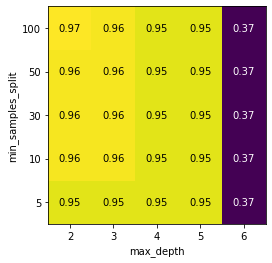

In [15]:
scores = np.array(results.mean_test_score).reshape(5,5)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, 
                      xlabel='max_depth', xticklabels=param_grid['max_depth'],
                      ylabel='min_samples_split', yticklabels=param_grid['min_samples_split'],
                      cmap='viridis'            
                      )

In [16]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [17]:
# 매개변수 그리드
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }

grid_search = GridSearchCV(SVC(), 
                           param_grid, cv=5, return_train_score=True)
grid_search

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

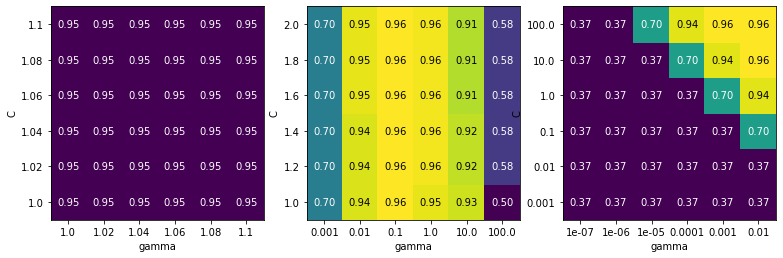

In [18]:
fig, axes = plt.subplots(1,3, figsize=(13,5))

param_grid_linear = {'C':np.linspace(1.0, 1.1, 6),
                     'gamma': np.linspace(1.0, 1.1, 6) }

param_grid_one_log = {'C':np.linspace(1,2,6), 
                     'gamma': np.logspace(-3,2,6) }

param_grid_range = {'C': np.logspace(-3,2,6),
                    'gamma': np.logspace(-7,-2,6) }

for param_grid, ax in zip([param_grid_linear,
                            param_grid_one_log,
                            param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    

    # 교차 검증 평균 점수 히트맵 그래프
    scores_image = mglearn.tools.heatmap(scores, 
                      xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'],
                      cmap='viridis', ax=ax                                       
                      )

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [22]:
train = pd.read_csv("santander/train.csv", encoding='latin-1')
test = pd.read_csv("santander/test.csv", encoding='latin-1')
sub = pd.read_csv("santander/sample_submission.csv")

train.shape, test.shape, sub.shape

((76020, 371), (75818, 370), (75818, 2))

In [23]:
cnt=0
for one in train.columns:
    print(one, end="  ")
    cnt += 1
    if cnt%20==0:
        print()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  
ind_var1_0  ind_var1  ind_var2_0  ind_var2  ind_var5_0  ind_var5  ind_var6_0  ind_var6  ind_var8_0  ind_var8  ind_var12_0  ind_var12  ind_var13_0  ind_var13_corto_0  ind_var13_corto  ind_var13_largo_0  ind_var13_largo  ind_var13_medio_0  ind_var13_medio  ind_var13  
ind_var14_0  ind_var14  ind_var17_0  ind_var17  ind_var18_0  ind_var18  ind_var19  ind_var20_0  ind_var20  ind_var24_0  ind_var24  ind_var25_cte  ind_var26_0  ind_var26_cte  ind_var26  ind_var25_0  ind_var25  ind_var27_0  ind_var28_0  ind_var28  
ind_var27  ind_var29_0  ind_var29  ind_var30_0  ind_var30  ind_var31_0 

In [24]:
train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [25]:
satified = train['TARGET'].value_counts()[0]    # 만족
unsatified = train['TARGET'].value_counts()[1]  # 불만족
all_count = train['TARGET'].count()

print("{:.3f}% {:.3f}%".format( (satified/all_count) * 100 , 
                               (unsatified/all_count) * 100 ) )

96.043% 3.957%


In [26]:
train['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 218           1
 215           1
 151           1
 87            1
 191           1
Name: var3, Length: 208, dtype: int64

In [27]:
# -999999를 가장 많은 나온 값으로 변경
train['var3'].replace(-999999, 2, inplace=True)

In [28]:
# 실제 확인
train.loc[ train['var3']==-999999, : ]

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [29]:
## ID 열을 삭제
# train.drop('ID', axis=1, inplace=True)
train = train.loc[  :, "var3":  ]
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte

In [30]:
# 피처와 레이블를 지정.
# TARGET를 제외한 열을 입력으로(X), TARGET열을 y로 지정
X = train.iloc[:, :-1]
y = train['TARGET']

X.shape, y.shape

((76020, 369), (76020,))

In [31]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, 
                                                     stratify=y,
                                                     test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

In [32]:
## target(레이블) 분포비율
print( "학습용 레이블 분포 비율 : \n" , y_train.value_counts() / y_train.count() )
print( "테스트용 레이블 분포 비율 : \n" , y_train.value_counts() / y_train.count() )

학습용 레이블 분포 비율 : 
 0    0.960438
1    0.039562
Name: TARGET, dtype: float64
테스트용 레이블 분포 비율 : 
 0    0.960438
1    0.039562
Name: TARGET, dtype: float64


In [33]:
%%time

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_model = XGBClassifier(n_estimators=500, random_state=156)
xgb_model.fit(X_train, y_train, 
              early_stopping_rounds=100,
              eval_metric='auc', 
              eval_set=[(X_train, y_train), (X_test, y_test)])

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82570	validation_1-auc:0.79283
[1]	validation_0-auc:0.84010	validation_1-auc:0.80737
[2]	validation_0-auc:0.84361	validation_1-auc:0.81021
[3]	validation_0-auc:0.84783	validation_1-auc:0.81287
[4]	validation_0-auc:0.85123	validation_1-auc:0.81469
[5]	validation_0-auc:0.85518	validation_1-auc:0.81860
[6]	validation_0-auc:0.85922	validation_1-auc:0.81977
[7]	validation_0-auc:0.86238	validation_1-auc:0.82034
[8]	validation_0-auc:0.86570	validation_1-auc:0.82147
[9]	validation_0-auc:0.86798	validation_1-auc:0.82301
[10]	validation_0-auc:0.87104	validation_1-auc:0.82379
[11]	validation_0-auc:0.87448	validation_1-auc:0.82456
[12]	validation_0-auc:0.87687	validation_1-auc:0.82401
[13]	validation_0-auc:0.87918	validation_1-auc:0.82467
[14]	validation_0-auc:0.88081	validation_1-auc:0.82508
[15]	validation_0-auc:0.88331	validation_1-auc:0.82379
[16]	validation_0-auc:0.88569	validation_1-auc:0.82457
[17]	validation_0-auc:0.88674	validation_1-auc:0.82453
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, ...)

In [40]:
# 0의 예측 확률, 1의 예측 확률
pred_prob = xgb_model.predict_proba(X_test)[:, 1]
pred_prob

array([0.00690398, 0.02649283, 0.01910355, ..., 0.01988643, 0.01178615,
       0.00611465], dtype=float32)

In [35]:
# 실제값(y_test)와 예측값(pred_prob)
xgb_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

ROC AUC : 0.8251


In [36]:
pred_01 = pred_prob > 0.1
pred_01

array([False, False, False, ..., False, False, False])

In [37]:
# 실제값(y_test)와 예측값(pred_prob)
xgb_roc_score = roc_auc_score(y_test, pred_01, average='macro')
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

ROC AUC : 0.7161


In [38]:
%%time

from sklearn.model_selection import GridSearchCV

# 우선 하이퍼 파라미터 수행 속도를 향상을 위해 100으로
xgb_model1 = XGBClassifier(n_estimators=100, use_label_encoder=False)
params = {"max_depth":[5,7],
          "min_child_weight":[1,3],
          "colsample_bytree":[0.5, 0.75]}

gridcv = GridSearchCV(xgb_model1, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, 
            eval_metric='auc', 
            eval_set = [(X_train, y_train), (X_test, y_test)])

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81018	validation_1-auc:0.78188
[1]	validation_0-auc:0.82545	validation_1-auc:0.79768
[2]	validation_0-auc:0.83140	validation_1-auc:0.80216
[3]	validation_0-auc:0.83516	validation_1-auc:0.80198
[4]	validation_0-auc:0.83771	validation_1-auc:0.80506
[5]	validation_0-auc:0.84300	validation_1-auc:0.81035
[6]	validation_0-auc:0.84062	validation_1-auc:0.80790
[7]	validation_0-auc:0.84891	validation_1-auc:0.81507
[8]	validation_0-auc:0.85188	validation_1-auc:0.81522
[9]	validation_0-auc:0.85270	validation_1-auc:0.81168
[10]	validation_0-auc:0.85247	validation_1-auc:0.80830
[11]	validation_0-auc:0.85177	validation_1-auc:0.80637
[12]	validation_0-auc:0.85755	validation_1-auc:0.81189
[13]	validation_0-auc:0.86087	validation_1-auc:0.81560
[14]	validation_0-auc:0.86280	validation_1-auc:0.81838
[15]	validation_0-auc:0.86444	validation_1-auc:0.81759
[16]	validation_0-auc:0.86525	validation_1-auc:0.81930
[17]	validation_0-auc:0.86676	validation_1-auc:0.82054
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80190	validation_1-auc:0.77107
[1]	validation_0-auc:0.82224	validation_1-auc:0.79236
[2]	validation_0-auc:0.82855	validation_1-auc:0.79731
[3]	validation_0-auc:0.83272	validation_1-auc:0.80100
[4]	validation_0-auc:0.83879	validation_1-auc:0.80653
[5]	validation_0-auc:0.84195	validation_1-auc:0.80909
[6]	validation_0-auc:0.84137	validation_1-auc:0.80657
[7]	validation_0-auc:0.84732	validation_1-auc:0.81398
[8]	validation_0-auc:0.85179	validation_1-auc:0.81664
[9]	validation_0-auc:0.85311	validation_1-auc:0.81394
[10]	validation_0-auc:0.85239	validation_1-auc:0.81017
[11]	validation_0-auc:0.85279	validation_1-auc:0.80784
[12]	validation_0-auc:0.85759	validation_1-auc:0.81340
[13]	validation_0-auc:0.86136	validation_1-auc:0.81643
[14]	validation_0-auc:0.86298	validation_1-auc:0.81759
[15]	validation_0-auc:0.86409	validation_1-auc:0.81705
[16]	validation_0-auc:0.86491	validation_1-auc:0.81799
[17]	validation_0-auc:0.86655	validation_1-auc:0.81816
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80336	validation_1-auc:0.77696
[1]	validation_0-auc:0.82430	validation_1-auc:0.79852
[2]	validation_0-auc:0.83285	validation_1-auc:0.80769
[3]	validation_0-auc:0.83623	validation_1-auc:0.81104
[4]	validation_0-auc:0.84003	validation_1-auc:0.81154
[5]	validation_0-auc:0.83913	validation_1-auc:0.80673
[6]	validation_0-auc:0.83899	validation_1-auc:0.80485
[7]	validation_0-auc:0.84544	validation_1-auc:0.80996
[8]	validation_0-auc:0.84991	validation_1-auc:0.81530
[9]	validation_0-auc:0.85052	validation_1-auc:0.81157
[10]	validation_0-auc:0.85206	validation_1-auc:0.80830
[11]	validation_0-auc:0.85239	validation_1-auc:0.80717
[12]	validation_0-auc:0.85710	validation_1-auc:0.81409
[13]	validation_0-auc:0.86031	validation_1-auc:0.81699
[14]	validation_0-auc:0.86164	validation_1-auc:0.81783
[15]	validation_0-auc:0.86300	validation_1-auc:0.81652
[16]	validation_0-auc:0.86485	validation_1-auc:0.81957
[17]	validation_0-auc:0.86620	validation_1-auc:0.82128
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81016	validation_1-auc:0.78166
[1]	validation_0-auc:0.82562	validation_1-auc:0.79846
[2]	validation_0-auc:0.83299	validation_1-auc:0.80352
[3]	validation_0-auc:0.83448	validation_1-auc:0.80464
[4]	validation_0-auc:0.83803	validation_1-auc:0.80699
[5]	validation_0-auc:0.84222	validation_1-auc:0.81031
[6]	validation_0-auc:0.84076	validation_1-auc:0.80917
[7]	validation_0-auc:0.84800	validation_1-auc:0.81445
[8]	validation_0-auc:0.85033	validation_1-auc:0.81702
[9]	validation_0-auc:0.85129	validation_1-auc:0.81414
[10]	validation_0-auc:0.85203	validation_1-auc:0.81003
[11]	validation_0-auc:0.85056	validation_1-auc:0.80803
[12]	validation_0-auc:0.85584	validation_1-auc:0.81431
[13]	validation_0-auc:0.85874	validation_1-auc:0.81733
[14]	validation_0-auc:0.86039	validation_1-auc:0.81766
[15]	validation_0-auc:0.86168	validation_1-auc:0.81730
[16]	validation_0-auc:0.86311	validation_1-auc:0.81900
[17]	validation_0-auc:0.86405	validation_1-auc:0.81977
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80086	validation_1-auc:0.77134
[1]	validation_0-auc:0.82270	validation_1-auc:0.79361
[2]	validation_0-auc:0.82927	validation_1-auc:0.79856
[3]	validation_0-auc:0.83701	validation_1-auc:0.81021
[4]	validation_0-auc:0.84064	validation_1-auc:0.81159
[5]	validation_0-auc:0.84276	validation_1-auc:0.81091
[6]	validation_0-auc:0.84273	validation_1-auc:0.80946
[7]	validation_0-auc:0.84802	validation_1-auc:0.81573
[8]	validation_0-auc:0.85186	validation_1-auc:0.81745
[9]	validation_0-auc:0.85241	validation_1-auc:0.81444
[10]	validation_0-auc:0.85191	validation_1-auc:0.80997
[11]	validation_0-auc:0.85160	validation_1-auc:0.80854
[12]	validation_0-auc:0.85719	validation_1-auc:0.81449
[13]	validation_0-auc:0.86041	validation_1-auc:0.81682
[14]	validation_0-auc:0.86170	validation_1-auc:0.81865
[15]	validation_0-auc:0.86223	validation_1-auc:0.81810
[16]	validation_0-auc:0.86336	validation_1-auc:0.81981
[17]	validation_0-auc:0.86427	validation_1-auc:0.81930
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81057	validation_1-auc:0.78632
[1]	validation_0-auc:0.82979	validation_1-auc:0.80686
[2]	validation_0-auc:0.83353	validation_1-auc:0.81043
[3]	validation_0-auc:0.83822	validation_1-auc:0.81393
[4]	validation_0-auc:0.84095	validation_1-auc:0.81539
[5]	validation_0-auc:0.84153	validation_1-auc:0.81107
[6]	validation_0-auc:0.84116	validation_1-auc:0.80706
[7]	validation_0-auc:0.84847	validation_1-auc:0.81288
[8]	validation_0-auc:0.85140	validation_1-auc:0.81635
[9]	validation_0-auc:0.85185	validation_1-auc:0.81116
[10]	validation_0-auc:0.85156	validation_1-auc:0.80831
[11]	validation_0-auc:0.85131	validation_1-auc:0.80834
[12]	validation_0-auc:0.85553	validation_1-auc:0.81266
[13]	validation_0-auc:0.85886	validation_1-auc:0.81620
[14]	validation_0-auc:0.86079	validation_1-auc:0.81843
[15]	validation_0-auc:0.86184	validation_1-auc:0.81684
[16]	validation_0-auc:0.86330	validation_1-auc:0.81961
[17]	validation_0-auc:0.86458	validation_1-auc:0.82046
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82031	validation_1-auc:0.79118
[1]	validation_0-auc:0.83414	validation_1-auc:0.80055
[2]	validation_0-auc:0.83743	validation_1-auc:0.80321
[3]	validation_0-auc:0.84152	validation_1-auc:0.80461
[4]	validation_0-auc:0.84718	validation_1-auc:0.80869
[5]	validation_0-auc:0.85122	validation_1-auc:0.81150
[6]	validation_0-auc:0.85143	validation_1-auc:0.80762
[7]	validation_0-auc:0.86119	validation_1-auc:0.81223
[8]	validation_0-auc:0.86555	validation_1-auc:0.81523
[9]	validation_0-auc:0.86666	validation_1-auc:0.81064
[10]	validation_0-auc:0.86744	validation_1-auc:0.80571
[11]	validation_0-auc:0.86900	validation_1-auc:0.80273
[12]	validation_0-auc:0.87455	validation_1-auc:0.80680
[13]	validation_0-auc:0.87936	validation_1-auc:0.81005
[14]	validation_0-auc:0.88134	validation_1-auc:0.81139
[15]	validation_0-auc:0.88245	validation_1-auc:0.81039
[16]	validation_0-auc:0.88475	validation_1-auc:0.81181
[17]	validation_0-auc:0.88664	validation_1-auc:0.81336
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81340	validation_1-auc:0.78197
[1]	validation_0-auc:0.83354	validation_1-auc:0.79994
[2]	validation_0-auc:0.83892	validation_1-auc:0.80340
[3]	validation_0-auc:0.84315	validation_1-auc:0.80711
[4]	validation_0-auc:0.84977	validation_1-auc:0.81179
[5]	validation_0-auc:0.85268	validation_1-auc:0.81081
[6]	validation_0-auc:0.85382	validation_1-auc:0.80703
[7]	validation_0-auc:0.86158	validation_1-auc:0.81244
[8]	validation_0-auc:0.86567	validation_1-auc:0.81509
[9]	validation_0-auc:0.86756	validation_1-auc:0.81049
[10]	validation_0-auc:0.86820	validation_1-auc:0.80499
[11]	validation_0-auc:0.86904	validation_1-auc:0.80340
[12]	validation_0-auc:0.87395	validation_1-auc:0.81174
[13]	validation_0-auc:0.87750	validation_1-auc:0.81568
[14]	validation_0-auc:0.87863	validation_1-auc:0.81628
[15]	validation_0-auc:0.87979	validation_1-auc:0.81577
[16]	validation_0-auc:0.88093	validation_1-auc:0.81711
[17]	validation_0-auc:0.88306	validation_1-auc:0.81827
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81350	validation_1-auc:0.78157
[1]	validation_0-auc:0.83210	validation_1-auc:0.80236
[2]	validation_0-auc:0.84026	validation_1-auc:0.80923
[3]	validation_0-auc:0.84491	validation_1-auc:0.81224
[4]	validation_0-auc:0.85210	validation_1-auc:0.81697
[5]	validation_0-auc:0.85410	validation_1-auc:0.81152
[6]	validation_0-auc:0.85502	validation_1-auc:0.80849
[7]	validation_0-auc:0.86243	validation_1-auc:0.81302
[8]	validation_0-auc:0.86614	validation_1-auc:0.81508
[9]	validation_0-auc:0.86823	validation_1-auc:0.81076
[10]	validation_0-auc:0.86852	validation_1-auc:0.80495
[11]	validation_0-auc:0.86890	validation_1-auc:0.80265
[12]	validation_0-auc:0.87349	validation_1-auc:0.80838
[13]	validation_0-auc:0.87752	validation_1-auc:0.81119
[14]	validation_0-auc:0.87972	validation_1-auc:0.81168
[15]	validation_0-auc:0.88164	validation_1-auc:0.80994
[16]	validation_0-auc:0.88376	validation_1-auc:0.81302
[17]	validation_0-auc:0.88526	validation_1-auc:0.81388
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81917	validation_1-auc:0.79054
[1]	validation_0-auc:0.83371	validation_1-auc:0.80237
[2]	validation_0-auc:0.83966	validation_1-auc:0.80628
[3]	validation_0-auc:0.84137	validation_1-auc:0.80729
[4]	validation_0-auc:0.84640	validation_1-auc:0.81165
[5]	validation_0-auc:0.84899	validation_1-auc:0.81242
[6]	validation_0-auc:0.85023	validation_1-auc:0.80952
[7]	validation_0-auc:0.86012	validation_1-auc:0.81778
[8]	validation_0-auc:0.86366	validation_1-auc:0.81832
[9]	validation_0-auc:0.86322	validation_1-auc:0.81397
[10]	validation_0-auc:0.86371	validation_1-auc:0.80891
[11]	validation_0-auc:0.86403	validation_1-auc:0.80753
[12]	validation_0-auc:0.86965	validation_1-auc:0.81214
[13]	validation_0-auc:0.87385	validation_1-auc:0.81481
[14]	validation_0-auc:0.87588	validation_1-auc:0.81646
[15]	validation_0-auc:0.87683	validation_1-auc:0.81632
[16]	validation_0-auc:0.87860	validation_1-auc:0.81768
[17]	validation_0-auc:0.88008	validation_1-auc:0.81932
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81527	validation_1-auc:0.78584
[1]	validation_0-auc:0.83156	validation_1-auc:0.80004
[2]	validation_0-auc:0.83866	validation_1-auc:0.80479
[3]	validation_0-auc:0.84281	validation_1-auc:0.80826
[4]	validation_0-auc:0.84876	validation_1-auc:0.81493
[5]	validation_0-auc:0.85209	validation_1-auc:0.81219
[6]	validation_0-auc:0.85251	validation_1-auc:0.80656
[7]	validation_0-auc:0.85920	validation_1-auc:0.81278
[8]	validation_0-auc:0.86436	validation_1-auc:0.81594
[9]	validation_0-auc:0.86451	validation_1-auc:0.81010
[10]	validation_0-auc:0.86345	validation_1-auc:0.80571
[11]	validation_0-auc:0.86410	validation_1-auc:0.80601
[12]	validation_0-auc:0.86914	validation_1-auc:0.81168
[13]	validation_0-auc:0.87289	validation_1-auc:0.81496
[14]	validation_0-auc:0.87455	validation_1-auc:0.81703
[15]	validation_0-auc:0.87594	validation_1-auc:0.81647
[16]	validation_0-auc:0.87780	validation_1-auc:0.81818
[17]	validation_0-auc:0.87971	validation_1-auc:0.81900
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81665	validation_1-auc:0.78788
[1]	validation_0-auc:0.83578	validation_1-auc:0.80443
[2]	validation_0-auc:0.84235	validation_1-auc:0.81030
[3]	validation_0-auc:0.84297	validation_1-auc:0.81134
[4]	validation_0-auc:0.84814	validation_1-auc:0.81240
[5]	validation_0-auc:0.85031	validation_1-auc:0.80907
[6]	validation_0-auc:0.85210	validation_1-auc:0.80571
[7]	validation_0-auc:0.85927	validation_1-auc:0.80967
[8]	validation_0-auc:0.86421	validation_1-auc:0.81433
[9]	validation_0-auc:0.86538	validation_1-auc:0.81270
[10]	validation_0-auc:0.86488	validation_1-auc:0.80685
[11]	validation_0-auc:0.86398	validation_1-auc:0.80381
[12]	validation_0-auc:0.86871	validation_1-auc:0.80952
[13]	validation_0-auc:0.87264	validation_1-auc:0.81170
[14]	validation_0-auc:0.87470	validation_1-auc:0.81505
[15]	validation_0-auc:0.87649	validation_1-auc:0.81380
[16]	validation_0-auc:0.87808	validation_1-auc:0.81618
[17]	validation_0-auc:0.87988	validation_1-auc:0.81782
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81858	validation_1-auc:0.78761
[1]	validation_0-auc:0.82302	validation_1-auc:0.79326
[2]	validation_0-auc:0.83321	validation_1-auc:0.80485
[3]	validation_0-auc:0.83635	validation_1-auc:0.80627
[4]	validation_0-auc:0.83821	validation_1-auc:0.80698
[5]	validation_0-auc:0.84051	validation_1-auc:0.80839
[6]	validation_0-auc:0.84479	validation_1-auc:0.81310
[7]	validation_0-auc:0.84746	validation_1-auc:0.81415
[8]	validation_0-auc:0.85071	validation_1-auc:0.81566
[9]	validation_0-auc:0.85353	validation_1-auc:0.81646
[10]	validation_0-auc:0.85553	validation_1-auc:0.81325
[11]	validation_0-auc:0.85645	validation_1-auc:0.81063
[12]	validation_0-auc:0.85986	validation_1-auc:0.81491
[13]	validation_0-auc:0.86053	validation_1-auc:0.81678
[14]	validation_0-auc:0.86215	validation_1-auc:0.81761
[15]	validation_0-auc:0.86363	validation_1-auc:0.81874
[16]	validation_0-auc:0.86512	validation_1-auc:0.81924
[17]	validation_0-auc:0.86602	validation_1-auc:0.82091
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81566	validation_1-auc:0.78394
[1]	validation_0-auc:0.82348	validation_1-auc:0.78982
[2]	validation_0-auc:0.83405	validation_1-auc:0.80517
[3]	validation_0-auc:0.83708	validation_1-auc:0.80713
[4]	validation_0-auc:0.83836	validation_1-auc:0.80754
[5]	validation_0-auc:0.83989	validation_1-auc:0.80843
[6]	validation_0-auc:0.84602	validation_1-auc:0.81524
[7]	validation_0-auc:0.84900	validation_1-auc:0.81666
[8]	validation_0-auc:0.85078	validation_1-auc:0.81633
[9]	validation_0-auc:0.85439	validation_1-auc:0.81501
[10]	validation_0-auc:0.85539	validation_1-auc:0.81203
[11]	validation_0-auc:0.85631	validation_1-auc:0.80840
[12]	validation_0-auc:0.86035	validation_1-auc:0.81392
[13]	validation_0-auc:0.86296	validation_1-auc:0.81670
[14]	validation_0-auc:0.86386	validation_1-auc:0.81754
[15]	validation_0-auc:0.86518	validation_1-auc:0.81825
[16]	validation_0-auc:0.86615	validation_1-auc:0.81921
[17]	validation_0-auc:0.86731	validation_1-auc:0.81971
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81232	validation_1-auc:0.78399
[1]	validation_0-auc:0.82169	validation_1-auc:0.79494
[2]	validation_0-auc:0.83369	validation_1-auc:0.80739
[3]	validation_0-auc:0.83596	validation_1-auc:0.80871
[4]	validation_0-auc:0.83995	validation_1-auc:0.81172
[5]	validation_0-auc:0.84105	validation_1-auc:0.81099
[6]	validation_0-auc:0.84623	validation_1-auc:0.81538
[7]	validation_0-auc:0.84758	validation_1-auc:0.81518
[8]	validation_0-auc:0.85002	validation_1-auc:0.81826
[9]	validation_0-auc:0.85332	validation_1-auc:0.81769
[10]	validation_0-auc:0.85412	validation_1-auc:0.81517
[11]	validation_0-auc:0.85379	validation_1-auc:0.81176
[12]	validation_0-auc:0.85707	validation_1-auc:0.81459
[13]	validation_0-auc:0.86011	validation_1-auc:0.81778
[14]	validation_0-auc:0.86155	validation_1-auc:0.81936
[15]	validation_0-auc:0.86320	validation_1-auc:0.81883
[16]	validation_0-auc:0.86393	validation_1-auc:0.81969
[17]	validation_0-auc:0.86526	validation_1-auc:0.82079
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81740	validation_1-auc:0.79022
[1]	validation_0-auc:0.82740	validation_1-auc:0.79884
[2]	validation_0-auc:0.83295	validation_1-auc:0.80146
[3]	validation_0-auc:0.83449	validation_1-auc:0.80370
[4]	validation_0-auc:0.83895	validation_1-auc:0.80854
[5]	validation_0-auc:0.84142	validation_1-auc:0.81053
[6]	validation_0-auc:0.84576	validation_1-auc:0.81488
[7]	validation_0-auc:0.84778	validation_1-auc:0.81713
[8]	validation_0-auc:0.84973	validation_1-auc:0.81747
[9]	validation_0-auc:0.85302	validation_1-auc:0.81803
[10]	validation_0-auc:0.85449	validation_1-auc:0.81520
[11]	validation_0-auc:0.85401	validation_1-auc:0.81334
[12]	validation_0-auc:0.85779	validation_1-auc:0.81654
[13]	validation_0-auc:0.85929	validation_1-auc:0.81804
[14]	validation_0-auc:0.86067	validation_1-auc:0.81967
[15]	validation_0-auc:0.86171	validation_1-auc:0.82139
[16]	validation_0-auc:0.86292	validation_1-auc:0.82216
[17]	validation_0-auc:0.86354	validation_1-auc:0.82273
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81735	validation_1-auc:0.78665
[1]	validation_0-auc:0.82748	validation_1-auc:0.79597
[2]	validation_0-auc:0.83370	validation_1-auc:0.80543
[3]	validation_0-auc:0.83734	validation_1-auc:0.80804
[4]	validation_0-auc:0.83905	validation_1-auc:0.80760
[5]	validation_0-auc:0.84207	validation_1-auc:0.81112
[6]	validation_0-auc:0.84665	validation_1-auc:0.81593
[7]	validation_0-auc:0.84872	validation_1-auc:0.81764
[8]	validation_0-auc:0.85056	validation_1-auc:0.81722
[9]	validation_0-auc:0.85385	validation_1-auc:0.81838
[10]	validation_0-auc:0.85468	validation_1-auc:0.81452
[11]	validation_0-auc:0.85512	validation_1-auc:0.81354
[12]	validation_0-auc:0.85855	validation_1-auc:0.81689
[13]	validation_0-auc:0.86064	validation_1-auc:0.81913
[14]	validation_0-auc:0.86201	validation_1-auc:0.82067
[15]	validation_0-auc:0.86302	validation_1-auc:0.82135
[16]	validation_0-auc:0.86367	validation_1-auc:0.82130
[17]	validation_0-auc:0.86495	validation_1-auc:0.82157
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81423	validation_1-auc:0.78726
[1]	validation_0-auc:0.82967	validation_1-auc:0.80498
[2]	validation_0-auc:0.83684	validation_1-auc:0.80990
[3]	validation_0-auc:0.83964	validation_1-auc:0.81132
[4]	validation_0-auc:0.84111	validation_1-auc:0.81102
[5]	validation_0-auc:0.84234	validation_1-auc:0.81459
[6]	validation_0-auc:0.84650	validation_1-auc:0.81718
[7]	validation_0-auc:0.84877	validation_1-auc:0.81905
[8]	validation_0-auc:0.85022	validation_1-auc:0.82020
[9]	validation_0-auc:0.85295	validation_1-auc:0.81846
[10]	validation_0-auc:0.85351	validation_1-auc:0.81741
[11]	validation_0-auc:0.85373	validation_1-auc:0.81425
[12]	validation_0-auc:0.85663	validation_1-auc:0.81674
[13]	validation_0-auc:0.85886	validation_1-auc:0.81694
[14]	validation_0-auc:0.86044	validation_1-auc:0.81889
[15]	validation_0-auc:0.86171	validation_1-auc:0.81887
[16]	validation_0-auc:0.86238	validation_1-auc:0.81874
[17]	validation_0-auc:0.86333	validation_1-auc:0.81871
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82530	validation_1-auc:0.79157
[1]	validation_0-auc:0.83443	validation_1-auc:0.79525
[2]	validation_0-auc:0.84010	validation_1-auc:0.80004
[3]	validation_0-auc:0.84370	validation_1-auc:0.80236
[4]	validation_0-auc:0.84787	validation_1-auc:0.80527
[5]	validation_0-auc:0.85265	validation_1-auc:0.81015
[6]	validation_0-auc:0.85812	validation_1-auc:0.81266
[7]	validation_0-auc:0.86166	validation_1-auc:0.81590
[8]	validation_0-auc:0.86517	validation_1-auc:0.81637
[9]	validation_0-auc:0.86877	validation_1-auc:0.81747
[10]	validation_0-auc:0.87154	validation_1-auc:0.81423
[11]	validation_0-auc:0.87142	validation_1-auc:0.81163
[12]	validation_0-auc:0.87713	validation_1-auc:0.81491
[13]	validation_0-auc:0.88022	validation_1-auc:0.81550
[14]	validation_0-auc:0.88209	validation_1-auc:0.81798
[15]	validation_0-auc:0.88417	validation_1-auc:0.81926
[16]	validation_0-auc:0.88580	validation_1-auc:0.81852
[17]	validation_0-auc:0.88678	validation_1-auc:0.81953
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82055	validation_1-auc:0.78501
[1]	validation_0-auc:0.83442	validation_1-auc:0.79874
[2]	validation_0-auc:0.83681	validation_1-auc:0.79928
[3]	validation_0-auc:0.84360	validation_1-auc:0.80298
[4]	validation_0-auc:0.84960	validation_1-auc:0.80878
[5]	validation_0-auc:0.85261	validation_1-auc:0.81219
[6]	validation_0-auc:0.85652	validation_1-auc:0.81381
[7]	validation_0-auc:0.86218	validation_1-auc:0.81773
[8]	validation_0-auc:0.86536	validation_1-auc:0.81875
[9]	validation_0-auc:0.87060	validation_1-auc:0.81710
[10]	validation_0-auc:0.87224	validation_1-auc:0.81588
[11]	validation_0-auc:0.87268	validation_1-auc:0.81247
[12]	validation_0-auc:0.87696	validation_1-auc:0.81447
[13]	validation_0-auc:0.88041	validation_1-auc:0.81713
[14]	validation_0-auc:0.88166	validation_1-auc:0.81755
[15]	validation_0-auc:0.88289	validation_1-auc:0.81956
[16]	validation_0-auc:0.88373	validation_1-auc:0.81968
[17]	validation_0-auc:0.88445	validation_1-auc:0.82074
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81782	validation_1-auc:0.78941
[1]	validation_0-auc:0.82613	validation_1-auc:0.79719
[2]	validation_0-auc:0.84226	validation_1-auc:0.80849
[3]	validation_0-auc:0.84825	validation_1-auc:0.81000
[4]	validation_0-auc:0.85201	validation_1-auc:0.81161
[5]	validation_0-auc:0.85313	validation_1-auc:0.81203
[6]	validation_0-auc:0.85801	validation_1-auc:0.81421
[7]	validation_0-auc:0.86135	validation_1-auc:0.81539
[8]	validation_0-auc:0.86621	validation_1-auc:0.81988
[9]	validation_0-auc:0.86820	validation_1-auc:0.81696
[10]	validation_0-auc:0.86885	validation_1-auc:0.81368
[11]	validation_0-auc:0.86929	validation_1-auc:0.80975
[12]	validation_0-auc:0.87461	validation_1-auc:0.81382
[13]	validation_0-auc:0.87841	validation_1-auc:0.81523
[14]	validation_0-auc:0.88082	validation_1-auc:0.81607
[15]	validation_0-auc:0.88311	validation_1-auc:0.81571
[16]	validation_0-auc:0.88480	validation_1-auc:0.81775
[17]	validation_0-auc:0.88638	validation_1-auc:0.81777
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82371	validation_1-auc:0.79441
[1]	validation_0-auc:0.83219	validation_1-auc:0.79713
[2]	validation_0-auc:0.83924	validation_1-auc:0.80071
[3]	validation_0-auc:0.84164	validation_1-auc:0.80063
[4]	validation_0-auc:0.84779	validation_1-auc:0.80814
[5]	validation_0-auc:0.85254	validation_1-auc:0.81182
[6]	validation_0-auc:0.85837	validation_1-auc:0.81536
[7]	validation_0-auc:0.86045	validation_1-auc:0.81643
[8]	validation_0-auc:0.86396	validation_1-auc:0.81603
[9]	validation_0-auc:0.86661	validation_1-auc:0.81434
[10]	validation_0-auc:0.86841	validation_1-auc:0.81200
[11]	validation_0-auc:0.86837	validation_1-auc:0.81087
[12]	validation_0-auc:0.87315	validation_1-auc:0.81463
[13]	validation_0-auc:0.87582	validation_1-auc:0.81752
[14]	validation_0-auc:0.87757	validation_1-auc:0.81904
[15]	validation_0-auc:0.87913	validation_1-auc:0.82074
[16]	validation_0-auc:0.88078	validation_1-auc:0.82060
[17]	validation_0-auc:0.88150	validation_1-auc:0.82095
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82004	validation_1-auc:0.78748
[1]	validation_0-auc:0.83345	validation_1-auc:0.79688
[2]	validation_0-auc:0.83682	validation_1-auc:0.79909
[3]	validation_0-auc:0.84510	validation_1-auc:0.80708
[4]	validation_0-auc:0.85085	validation_1-auc:0.81161
[5]	validation_0-auc:0.85308	validation_1-auc:0.81278
[6]	validation_0-auc:0.85603	validation_1-auc:0.81354
[7]	validation_0-auc:0.86053	validation_1-auc:0.81571
[8]	validation_0-auc:0.86417	validation_1-auc:0.81667
[9]	validation_0-auc:0.86847	validation_1-auc:0.81525
[10]	validation_0-auc:0.86930	validation_1-auc:0.81084
[11]	validation_0-auc:0.86990	validation_1-auc:0.80906
[12]	validation_0-auc:0.87324	validation_1-auc:0.81078
[13]	validation_0-auc:0.87582	validation_1-auc:0.81393
[14]	validation_0-auc:0.87786	validation_1-auc:0.81482
[15]	validation_0-auc:0.87894	validation_1-auc:0.81736
[16]	validation_0-auc:0.87977	validation_1-auc:0.81808
[17]	validation_0-auc:0.88042	validation_1-auc:0.81832
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81647	validation_1-auc:0.78924
[1]	validation_0-auc:0.83512	validation_1-auc:0.80449
[2]	validation_0-auc:0.84357	validation_1-auc:0.80927
[3]	validation_0-auc:0.84553	validation_1-auc:0.81043
[4]	validation_0-auc:0.85017	validation_1-auc:0.81305
[5]	validation_0-auc:0.85214	validation_1-auc:0.81486
[6]	validation_0-auc:0.85534	validation_1-auc:0.81895
[7]	validation_0-auc:0.86086	validation_1-auc:0.81995
[8]	validation_0-auc:0.86417	validation_1-auc:0.82170
[9]	validation_0-auc:0.86845	validation_1-auc:0.81883
[10]	validation_0-auc:0.86827	validation_1-auc:0.81536
[11]	validation_0-auc:0.86915	validation_1-auc:0.81085
[12]	validation_0-auc:0.87304	validation_1-auc:0.81348
[13]	validation_0-auc:0.87588	validation_1-auc:0.81419
[14]	validation_0-auc:0.87842	validation_1-auc:0.81613
[15]	validation_0-auc:0.88027	validation_1-auc:0.81731
[16]	validation_0-auc:0.88153	validation_1-auc:0.81769
[17]	validation_0-auc:0.88211	validation_1-auc:0.81829
[18]	validation_0-au

C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bman4\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82600	validation_1-auc:0.79614
[1]	validation_0-auc:0.84282	validation_1-auc:0.80858
[2]	validation_0-auc:0.84893	validation_1-auc:0.81516
[3]	validation_0-auc:0.85490	validation_1-auc:0.81803
[4]	validation_0-auc:0.85928	validation_1-auc:0.82168
[5]	validation_0-auc:0.86200	validation_1-auc:0.82167
[6]	validation_0-auc:0.86828	validation_1-auc:0.82437
[7]	validation_0-auc:0.87083	validation_1-auc:0.82401
[8]	validation_0-auc:0.87382	validation_1-auc:0.82327
[9]	validation_0-auc:0.87595	validation_1-auc:0.82066
[10]	validation_0-auc:0.87905	validation_1-auc:0.81807
[11]	validation_0-auc:0.87956	validation_1-auc:0.81437
[12]	validation_0-auc:0.88382	validation_1-auc:0.81954
[13]	validation_0-auc:0.88735	validation_1-auc:0.82120
[14]	validation_0-auc:0.88991	validation_1-auc:0.82252
[15]	validation_0-auc:0.89236	validation_1-auc:0.82231
[16]	validation_0-auc:0.89355	validation_1-auc:0.82367
[17]	validation_0-auc:0.89559	validation_1-auc:0.82306
[18]	validation_0-au

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    